# Business & Data Understanding (Exploratory Data Analysis)
**Author:** Robert Smith  
**Date:** 06-18-2020

This notebook explores the UCI heart disease data to better understand how to clean and transform the data for down stream analysis. But first, we'll outline the main aspects of the project; namely the problem statement, goal, and data/features to be used.

## Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Goal

> To create a model with 80% accuracy at predicting whether or not a patient has heart disease and deploy a model pipeline on the Google Cloud.

## Data

The original data came from the Cleveland data (processed.cleveland.data) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). There is also a version of it available on [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci), but there are several inconsistencies with the original data source. 



## Features
Digging around the UCI repository, you'll find a description of the main fields used for machine learning. They are all provided as numeric fields, but upon closer inspection, some are actually ordinal, binary and categorical.
  
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 1 - typical angina
    * 2 - atypical angina
    * 3 - non-anginal pain
    * 4 - asymptomatic
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
    * 0 - normal
    * 1 - having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    * 2 - showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
    * 1 - upsloping
    * 2 - flat
    * 3 - downsloping
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal
    * 3 - normal
    * 6 - fixed defect
    * 7 - reversable defect
14. target - 0,1,2,3,4 (where > 0 indicates heart disease)

## Import Tools of the Trade

In [1]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn") # personal preference
import seaborn as sns

## Load Data

We've already downloaded the data set and saved it in the data folder. If you would like to download directly, the data set can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data)

In [2]:
col_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
             "thalach", "exang", "oldpeak", "slope","ca", "thal", "target"]

df = pd.read_csv("../data/processed.cleveland.data", names = col_names, na_values = "?")

## Data Transformations Required
There are a few data transformations that need to take place in order to accurately explore our data. Based on the data type descriptions on the UCI Machine Learning Repository, we will convert some of the fields to be categorical. Namely,  
* `cp`
* `restecg`
* `thal`

The other features are either ordinal, binary, or numeric, so we'll leave them as is for now. 

To transform the three variables, we'll create a dictionary and replace each of the numeric values with its categorical counterpart. 

We also need to re-code our target so that it is binary. 

In [3]:
def data_transformer(df):
    
    cp_dict = {1: "typical angina",
               2: "atypical angina",
               3: "non-anginal pain", 
               4: "asymptomatic"}

    restecg_dict = {0: "normal", 
                    1: "wave abnormality", 
                    2: "ventricular hypertrophy"}

    thal_dict = {3 : "normal",
                 6 : "fixed defect",
                 7 : "reversable defect"}
    
    df["cp"].replace(cp_dict, inplace = True)
    df["restecg"].replace(restecg_dict, inplace = True)
    df["thal"].replace(thal_dict, inplace = True)
    
    df["target"] = (df["target"] > 0).astype(int)
    
    return df

In [4]:
df = data_transformer(df)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,typical angina,145.0,233.0,1.0,ventricular hypertrophy,150.0,0.0,2.3,3.0,0.0,fixed defect,0
1,67.0,1.0,asymptomatic,160.0,286.0,0.0,ventricular hypertrophy,108.0,1.0,1.5,2.0,3.0,normal,1
2,67.0,1.0,asymptomatic,120.0,229.0,0.0,ventricular hypertrophy,129.0,1.0,2.6,2.0,2.0,reversable defect,1
3,37.0,1.0,non-anginal pain,130.0,250.0,0.0,normal,187.0,0.0,3.5,3.0,0.0,normal,0
4,41.0,0.0,atypical angina,130.0,204.0,0.0,ventricular hypertrophy,172.0,0.0,1.4,1.0,0.0,normal,0


## Data Exploration

The goal here is to better understand the features we'll be working with to predict heart disease. Namely, we want to answer a few key questions:

1. What kind of data do we have and how do we treat different types?
2. What's missing from the data and how do you deal with it?
3. What are the outliers and why should you care about them?
4. How can you add, change or remove features to get more out of your data?



In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,typical angina,145.0,233.0,1.0,ventricular hypertrophy,150.0,0.0,2.3,3.0,0.0,fixed defect,0
1,67.0,1.0,asymptomatic,160.0,286.0,0.0,ventricular hypertrophy,108.0,1.0,1.5,2.0,3.0,normal,1
2,67.0,1.0,asymptomatic,120.0,229.0,0.0,ventricular hypertrophy,129.0,1.0,2.6,2.0,2.0,reversable defect,1
3,37.0,1.0,non-anginal pain,130.0,250.0,0.0,normal,187.0,0.0,3.5,3.0,0.0,normal,0
4,41.0,0.0,atypical angina,130.0,204.0,0.0,ventricular hypertrophy,172.0,0.0,1.4,1.0,0.0,normal,0


In [7]:
df.shape

(303, 14)

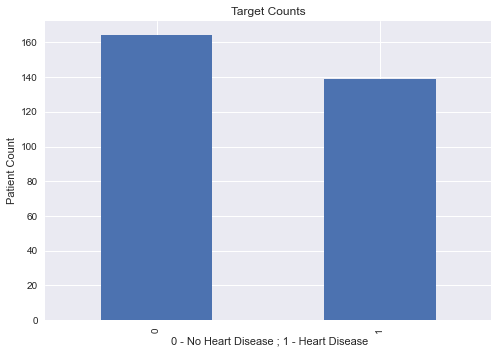

In [8]:
df["target"].value_counts().plot(kind = "bar")
plt.title("Target Counts")
plt.xlabel(" 0 - No Heart Disease ; 1 - Heart Disease")
plt.ylabel("Patient Count");

The target feature is actually quite balanced in this data set.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 33.3+ KB


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Houston, we found some nulls! Since it's not many, we'll use a `SimpleImputer` transformer in the scikit-learn pipeline.

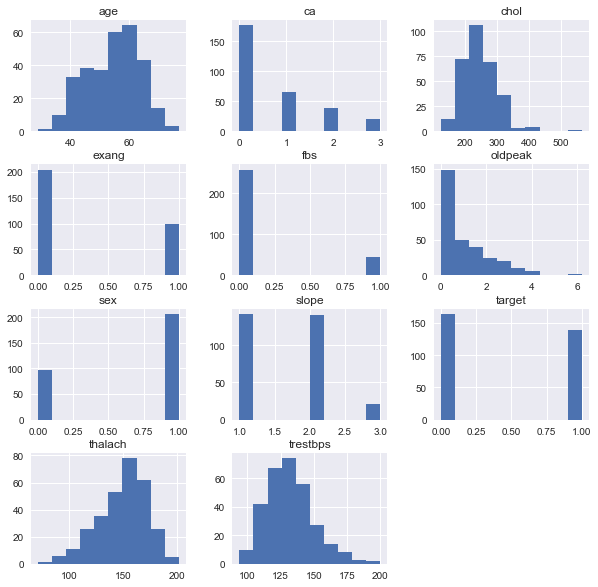

In [11]:
df.hist(figsize = (10,10));

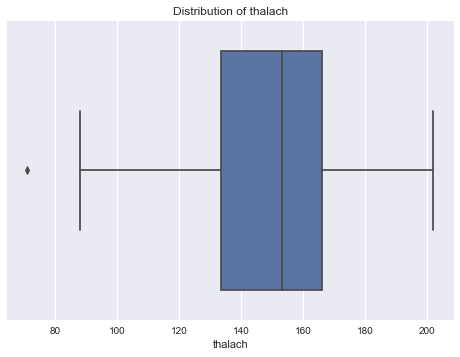

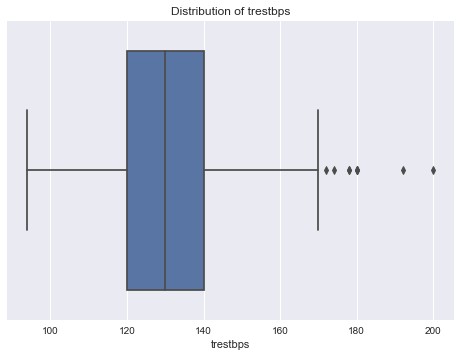

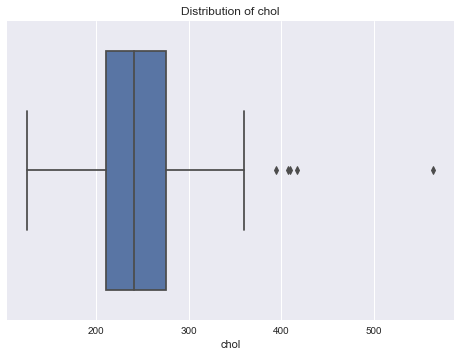

In [12]:
for cat in ["thalach", "trestbps", "chol"]:
    sns.boxplot(x = cat, data = df)
    plt.title(f"Distribution of {cat}")
    plt.show();

Looking at the distributions of the features, there don't appear to be outliers. The boxplots may indicate outliers, but the data does not follow a distribution and could benefit from the use of alternative uni-variate techniques including use of a medcouple analysis, a power transform, or similar. We'll explore the use of a power transform in our modeling exploration phase.

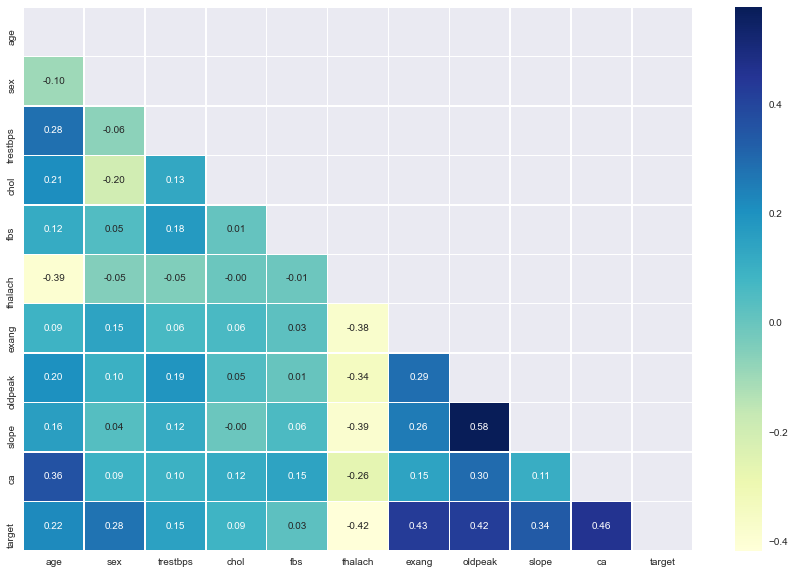

In [13]:
# Let's make out the feature correlation
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Plot Correlation 
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu",
                 mask = mask);

A few intersting findings... 
* `thalach` is negatively correlated with many features, including the target

* There are a few features with moderate correlation with the target; namely, `exang`, `oldpeak`, and `ca`

We'll have to see if these contribute significantly to the model's performance using a feature importance plot.

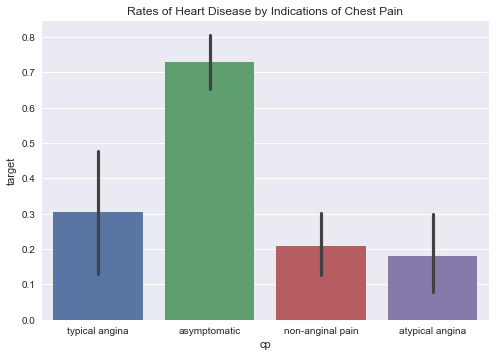

In [14]:
sns.barplot(x = "cp", y = "target", data = df) 
plt.title("Rates of Heart Disease by Indications of Chest Pain");

Wow, surprising result, most of those with heart disease are asymptomatic!

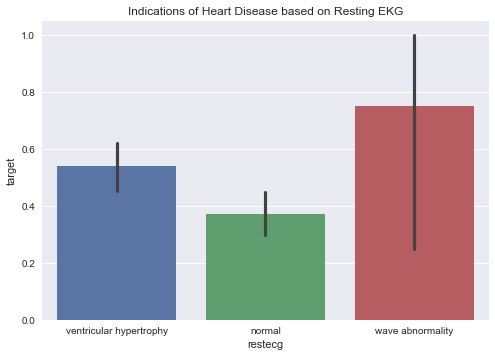

In [15]:
sns.barplot(x = "restecg", y = "target", data = df)
plt.title("Indications of Heart Disease based on Resting EKG");

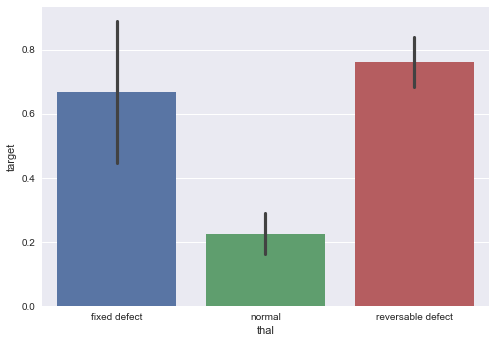

In [16]:
sns.barplot(x = "thal", y = "target", data = df);

To wrap up our EDA, let's take a look at some segmentations of our target feature vs various numeric values.

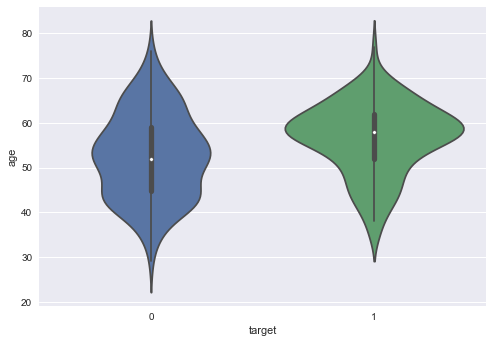

In [17]:
sns.violinplot(x = "target", y = "age", data = df);

Looks like older patients have an elevated risk of heart disease (as expected.)

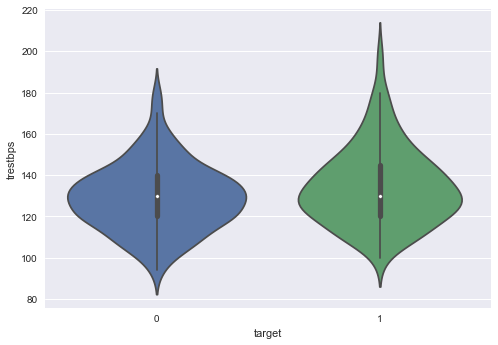

In [18]:
sns.violinplot(x = "target", y = "trestbps", data = df);

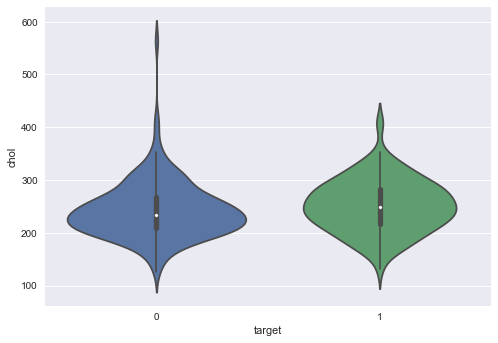

In [19]:
sns.violinplot(x = "target", y = "chol", data = df);

Alright - that'll wrap-up our initial EDA. You'll likely do more ad-hoc exploration during the modeling and experimentation phases, but this is a good start.